<a href="https://colab.research.google.com/github/ram-elgov/Statistics-For-CS/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1


In [34]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import expon, norm, poisson, uniform
from seaborn import kdeplot

In [2]:
K = 10 ** 4
sample_size = 10
bias = lambda estimations, parameter: parameter - np.mean(estimations)
var = lambda x: np.var(x, ddof=1)
mse = lambda var_mse, bias_mse: var_mse + bias_mse ** 2

theta = 5

## Uniform Distribution

In [3]:
# 1
uniform_samples = [uniform.rvs(0, theta, size=sample_size) for _ in range(K)]
est_1 = lambda x: 2 * np.mean(x)
est_2 = lambda x: max(x)
estimations_1 = [est_1(x) for x in uniform_samples] 
estimations_2 = [est_2(x) for x in uniform_samples]

In [4]:
# 2
bias_1 = bias(estimations_1, theta)
var_1 = var(estimations_1)
bias_2 = bias(estimations_2, theta)
var_2 = var(estimations_2)
print(f"mse(est_1): {mse(var_1, bias_1):.4f}")
print(f"mse(est_2): {mse(var_2, bias_2):.4f}")

mse(est_1): 0.8474
mse(est_2): 0.3868


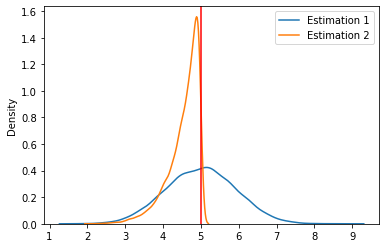

In [5]:
# 3
kdeplot(estimations_1, label="Estimation 1")
kdeplot(estimations_2, label="Estimation 2")
plt.axvline(x=theta, color="red")
plt.legend()
plt.show()

In [6]:
# 4
uniform_samples_20 = random.sample(uniform_samples, 20)
estimations_1 = [est_1(x) for x in uniform_samples_20]
print(f"E[est_1]={np.mean(estimations_1):.4f}, var(est1)={var(estimations_1):.4f}")

E[est_1]=4.9246, var(est1)=0.8122


## Exponential Distribution

In [7]:
# 1
expon_samples = [np.random.exponential(1,10) for _ in range(K)]
est_1 = lambda x: 1 / np.mean(x)
est_2 = lambda x: np.log(2) / np.median(x)
estimations_1 = [est_1(x) for x in expon_samples] 
estimations_2 = [est_2(x) for x in expon_samples] 

In [8]:
# 2
bias_1 = bias(estimations_1, 1)
var_1 = var(estimations_1)
bias_2 = bias(estimations_2, 1)
var_2 = var(estimations_2)
print(f"mse(est_1): {mse(var_1, bias_1):.4f}")
print(f"mse(est_2): {mse(var_2, bias_2):.4f}")

mse(est_1): 0.1637
mse(est_2): 0.3335


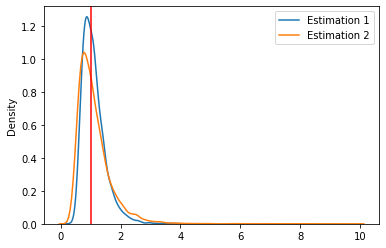

In [9]:
# 3
kdeplot(estimations_1, label="Estimation 1")
kdeplot(estimations_2, label="Estimation 2")
plt.axvline(x=1,color="red")
plt.legend()
plt.show()

In [10]:
# 4
expon_samples_20 = random.sample(expon_samples, 20)
estimations_1_ = [est_1(x) for x in expon_samples_20]
print(f"E[est_1]={np.mean(estimations_1):.4f}, var(est1)={var(estimations_1):.4f}")

E[est_1]=1.1049, var(est1)=0.1527


## Bonus

In [39]:
# X~N(mu,25)
print("X~N(mu,25)")
mu = 62
sigma = 5
p = norm.cdf((60 - mu) / sigma)
sample_size = 10
apply_indicator = np.vectorize(lambda number: 1 if number <= 60 else 0)
est_1 = lambda x: np.mean(apply_indicator(x))
est_2 = lambda x: norm.cdf((60 - np.mean(x)) / sigma)
# 1
norm_samples = [np.random.normal(mu, sigma, sample_size) for _ in range(K)]
estimations_1 = [est_1(x) for x in norm_samples] 
estimations_2 = [est_2(x) for x in norm_samples] 

X~N(mu,25)


In [40]:
# 2
bias_1 = bias(estimations_1, p)
var_1 = var(estimations_1)
bias_2 = bias(estimations_2, p)
var_2 = var(estimations_2)
print(f"mse(est_1): {mse(var_1, bias_1):.4f}")
print(f"mse(est_2): {mse(var_2, bias_2):.4f}")

mse(est_1): 0.0223
mse(est_2): 0.0124


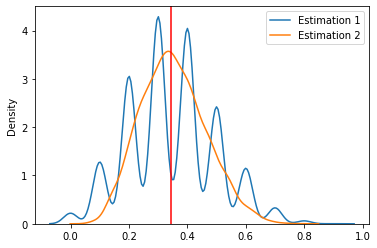

In [41]:
# 3
kdeplot(estimations_1, label="Estimation 1")
kdeplot(estimations_2, label="Estimation 2")
plt.axvline(x=p,color="red")
plt.legend()
plt.show()

In [42]:
# 4
norm_samples_20 = random.sample(norm_samples, 20)
estimations_1_ = [est_1(x) for x in norm_samples_20]
print(f"E[est_1]={np.mean(estimations_1):.4f}, var(est1)={var(estimations_1):.4f}")

E[est_1]=0.3458, var(est1)=0.0223


## Problem 2 Bonus

In [15]:
n = 1000

values = np.array([2, 4, 6, 1, 5, 5])
probabilities = np.array([1 / 6] * 6)
theoretical_expected_value = (values * probabilities).sum() / probabilities.sum()

vec = np.random.choice(values, size=n)
X = np.array([int(x == 1) for x in vec])

mle = lambda p: p ** (n * X.mean()) * (1 - p) ** (n - n * X.mean())
mle_1_6 = mle(1/6)
mle_1_3 = mle(1/3)
mle_1_2 = mle(1/2)

p_est_1 = X.mean()
if mle_1_6 > mle_1_3 and mle_1_6 > mle_1_2:
  p_est_2 = 1/6
elif mle_1_3 > mle_1_6 and mle_1_3 > mle_1_2:
  p_est_2 = 1/3
else:
  p_est_2 = 1/2

mu_est_1 = vec.mean()
mu_est_2 = 4.5 - 4 * p_est_2

print(f"p_est_1={p_est_1:.4f}, p_est_2={p_est_2:.4f}")
print(f"mu_est_1={mu_est_1:.4f}, mu_est_2={mu_est_2:.4f}")
print(f"Theoretical expected value: {theoretical_expected_value:.4f}")

p_est_1=0.1380, p_est_2=0.1667
mu_est_1=3.9180, mu_est_2=3.8333
Theoretical expected value: 3.8333


# Problem 4

In [16]:
K = 10 ** 4
sample_size = 20
lambdas = [0.1, 10]
bias = lambda estimations, parameter: parameter - np.mean(estimations)
var = lambda x: np.var(x, ddof=1)
mse = lambda var_mse, bias_mse: var_mse + bias_mse ** 2
est_expon = lambda x: 1 / np.mean(x)
est_poisson = lambda x: np.mean(x)

for lambda_ in lambdas:
  print(f"lambda = {lambda_}:")
  expon_samples = [np.random.exponential(1/lambda_,sample_size) for _ in range(K)]
  poisson_samples = [poisson.rvs(lambda_, size=sample_size) for _ in range(K)]
  estimations_expon = [est_expon(x) for x in expon_samples] 
  estimations_poisson = [est_poisson(x) for x in poisson_samples]
  bias_expon = bias(estimations_expon, lambda_)
  var_expon = var(estimations_expon)
  bias_poisson = bias(estimations_poisson, lambda_)
  var_poisson = var(estimations_poisson)
  print(f"mse(est_expon)={mse(var_expon, bias_expon):.3f}")
  print(f"mse(est_poisson)={mse(var_poisson, bias_poisson):.3f}")
  print()


lambda = 0.1:
mse(est_expon)=0.001
mse(est_poisson)=0.005

lambda = 10:
mse(est_expon)=6.678
mse(est_poisson)=0.488

